## Prueba de modelos ##

### Version 4: Modelo con 2 DER, planificación anual, granularidad horaria ###

Si el modelo tiene que optimizar el balance por horas, tiene 8640 VD, pero sigue teniendo 2 VD binarias

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [13]:
import pandapower as pp

In [7]:
import pyomo.environ as pe

In [8]:
import matplotlib.pyplot as plt

In [9]:
import ModelWriters as mw

In [10]:
import ModelWriters.Scenes as Scenes

In [11]:
import ModelWriters.Resources as Resources

In [14]:
net = pp.create_empty_network() 
b0 = pp.create_bus(net, vn_kv=13.2)

pp.create_ext_grid(net, bus=b0)

#ramal 1
b11 = pp.create_bus(net, vn_kv=13.2)
b12 = pp.create_bus(net, vn_kv=13.2)

pp.create_line(net, from_bus=b0, to_bus=b11, length_km=0.8, std_type="NAYY 4x50 SE")
pp.create_line(net, from_bus=b11, to_bus=b12, length_km=2.1, std_type="NAYY 4x50 SE")

pp.create_sgen(net, b11, p_mw=0.075, q_mvar=0.025, max_p_mw=0.15, max_q_mvar=0.15)
pp.create_load(net, bus=b12, p_mw=0.350)

#ramal 2
b21 = pp.create_bus(net, vn_kv=13.2)
pp.create_line(net, from_bus=b0, to_bus=b21, length_km=5.0, std_type="NAYY 4x50 SE")
pp.create_sgen(net, b21, p_mw=0.15, q_mvar=0.00, max_p_mw=0.40, max_q_mvar=0.10)
pp.create_storage(net, bus=b21, p_mw=0.25, q_mvar=0.1, max_e_mwh = 3.0)

#ramal 3
b31 = pp.create_bus(net, vn_kv=13.2)
b32 = pp.create_bus(net, vn_kv=13.2)
pp.create_line(net, from_bus=b0, to_bus=b31, length_km=0.5, std_type="NAYY 4x50 SE")
pp.create_line(net, from_bus=b31, to_bus=b32, length_km=1.5, std_type="NAYY 4x50 SE")
pp.create_sgen(net, b31, p_mw=0.08, q_mvar=0.00, max_p_mw=0.30, max_q_mvar=0.10)
pp.create_load(net, bus=b32, p_mw=0.85, q_mvar=0.33)


#ramal 4
b41 = pp.create_bus(net, vn_kv=13.2)
pp.create_line(net, from_bus=b0, to_bus=b41, length_km=0.5, std_type="NAYY 4x50 SE")
pp.create_load(net, bus=b41, p_mw=0.22, q_mvar=0.05)
#pp.create_storage(net, bus=b41, p_mw=0.5, q_mvar=0.1, max_e_mwh = 5.0)



2

In [15]:
net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar
0,None,1,0.075,0.025,NaN,1.0,True,wye,True,0.15,0.15
1,None,3,0.150,0.000,NaN,1.0,True,wye,True,0.40,0.10
2,None,4,0.080,0.000,NaN,1.0,True,wye,True,0.30,0.10


In [16]:
 pp.runpp(net)

In [12]:
print(net.res_bus.vm_pu)
print(net.res_line)

0    1.000000
1    0.999206
2    0.996501
3    0.997983
4    0.998497
5    0.993536
6    0.999583
Name: vm_pu, dtype: float64
   p_from_mw  q_from_mvar   p_to_mw     q_to_mvar     pl_mw   ql_mvar  \
0   0.276189    -0.058072 -0.275956  4.891292e-02  0.000233 -0.009159   
1   0.350956    -0.023913 -0.350000 -2.477944e-15  0.000956 -0.023913   
2   0.100279     0.042676 -0.100000 -1.000000e-01  0.000279 -0.057324   
3   0.775911     0.307919 -0.774624 -3.134920e-01  0.001287 -0.005573   
4   0.854624     0.313492 -0.850000 -3.300000e-01  0.004624 -0.016508   
5   0.220093     0.044267 -0.220000 -5.000000e-02  0.000093 -0.005733   

   i_from_ka   i_to_ka      i_ka  vm_from_pu  va_from_degree  vm_to_pu  \
0   0.012344  0.012268  0.012344    1.000000        0.000000  0.999206   
1   0.015398  0.015362  0.015398    0.999206       -0.015073  0.996501   
2   0.004767  0.006198  0.006198    1.000000        0.000000  0.997983   
3   0.036512  0.036605  0.036605    1.000000        0.000000  0.99

In [13]:
print(net)

This pandapower network includes the following parameter tables:
   - bus (7 elements)
   - load (3 elements)
   - sgen (3 elements)
   - storage (1 element)
   - ext_grid (1 element)
   - line (6 elements)
 and the following results tables:
   - res_bus (7 elements)
   - res_line (6 elements)
   - res_ext_grid (1 element)
   - res_load (3 elements)
   - res_sgen (3 elements)
   - res_storage (1 element)


## Construcción de Escenarios

In [14]:
#s = Scenes.SceneBuilder(years = 4, subperiods = 1, days_in_subperiods = 1, dt=12, growth_rate = 0.025, discount_rate = 0.05)
s = Scenes.SceneBuilder(years = 20, subperiods = 12, days_in_subperiods = 1, growth_rate = 0.025, discount_rate = 0.03)
#s = Scenes.SceneBuilder(years = 20, subperiods = 12, days_in_subperiods = 1, growth_rate = 0.025, discount_rate = 0.03)
scenes = s.build_scenes()
scenes

,year,day,dd,hour,dt,growth,discount,solar_irradiance,wind_speed
0,0.0,0.0,30.416667,0.0,1.0,1.00000,1.000000,0.0,0.331471
1,0.0,0.0,30.416667,1.0,1.0,1.00000,1.000000,0.0,1.048625
2,0.0,0.0,30.416667,2.0,1.0,1.00000,1.000000,0.0,1.832919
3,0.0,0.0,30.416667,3.0,1.0,1.00000,1.000000,0.0,3.290160
4,0.0,0.0,30.416667,4.0,1.0,1.00000,1.000000,0.0,2.935425
...,...,...,...,...,...,...,...,...,...
5755,19.0,330.0,30.416667,19.0,1.0,1.59865,0.570286,0.0,6.535191
5756,19.0,330.0,30.416667,20.0,1.0,1.59865,0.570286,0.0,8.243431
5757,19.0,330.0,30.416667,21.0,1.0,1.59865,0.570286,0.0,8.174354
5758,19.0,330.0,30.416667,22.0,1.0,1.59865,0.570286,0.0,11.735304


## Model Construction

Construccion automatica del modelo
Es un modelo de dimensionamiento de 3 DERs (WT+PV)

In [15]:
model_writer = mw.SimpleModelWriter(net, scenes)

In [16]:
model_writer.max_investement = 500e3

In [17]:
net.ext_grid['model'][0] = Resources.ExtGrid('SET', pr_mw = 5.0, peak_value=200, valley_value=120, rest_value=160)
#net.ext_grid['model'][0] = Resources.ExtGrid('SET', pr_mw = 5.0, peak_value=2000, valley_value=1500, rest_value=1000)

In [18]:
net.load['model'][0] = Resources.Load('Tornquinst', pr_mw = 0.35)
net.load['model'][1] = Resources.Load('Bell Ville', pr_mw = 0.85)
net.load['model'][2] = Resources.Load('City Bell', pr_mw = 0.22)

In [19]:
net.sgen['model'][0] = Resources.PVGenerator('PV1', ic_0_mu = 0.0, ic_1_mu = 1.02e6, oc_0_mu = 1.02, oc_1_mu = 0.0)
net.sgen['model'][1] = Resources.WTGeneratorDiscrete('WT1', unit_size_mw = 0.19, unit_cost_mu = 541e3, oc_0_mu = 0.00, oc_1_mu = 1.70)
net.sgen['model'][2] = Resources.PVGeneratorDiscrete('PV2', unit_size_mw = 0.05, unit_cost_mu = 51e3, oc_0_mu = 0.03, oc_1_mu = 0.0)

In [20]:
net.storage['model'][0] = Resources.Storage('ST1', ic_1_mu = 554e3, ic_1_mu_cap = 330e3, oc_1_mu = 2.28*4, eta_bb = 0.8, sigma = 2.1e-3)

In [21]:
 net.sgen['model'][0].pr_mw

1.0

In [33]:
net.sgen

[autoreload of ModelWriters.Simulation failed: Traceback (most recent call last):
  File "C:\Users\jmsar\.conda\envs\Tesis_1\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\jmsar\.conda\envs\Tesis_1\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\jmsar\.conda\envs\Tesis_1\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\jmsar\.conda\envs\Tesis_1\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\jmsar\Google Drive\OSS\Trabajo Final\Project\ModelWriters\Simulation\__init__.py", line 1, in <module>
    from .BaseSimulator import BaseSimu

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,None,1,0.075,0.025,NaN,1.0,True,wye,True,0.490196,0.245098,Resource: PV1
1,None,3,0.150,0.000,NaN,1.0,True,wye,True,0.000000,0.000000,Resource: WT1
2,None,4,0.080,0.000,NaN,1.0,True,wye,True,0.000000,0.000000,Resource: PV2


## Resolution

In [22]:
model = model_writer.create_model()

Additional constraints:

In [23]:
model_writer.additional_constraint("total_PV", net.sgen['model'][0].pr_mw + net.sgen['model'][2].pr_mw <= 1.5)
model_writer.additional_constraint("max_storage", net.storage['model'][0].er_mwh <= 1.0)

In [24]:
#model.pprint()

In [25]:
#solver_manager = pe.SolverManagerFactory('neos')
#result_obj = solver_manager.solve(model.model, opt='cplex')

opt = pe.SolverFactory('cplex')
#opt = pe.SolverFactory('glpk')
result_obj= opt.solve(model, tee=True)


Welcome to IBM(R) ILOG(R) CPLEX(R) Interactive Optimizer 20.1.0.0
  with Simplex, Mixed Integer & Barrier Optimizers
5725-A06 5725-A29 5724-Y48 5724-Y49 5724-Y54 5724-Y55 5655-Y21
Copyright IBM Corp. 1988, 2020.  All Rights Reserved.

Type 'help' for a list of available commands.
Type 'help' followed by a command name for more
information on commands.

CPLEX> Logfile 'cplex.log' closed.
Logfile 'C:\Users\jmsar\AppData\Local\Temp\tmp7d96k4bc.cplex.log' open.
CPLEX> Problem 'C:\Users\jmsar\AppData\Local\Temp\tmpjg4bhwtw.pyomo.lp' read.
Read time = 0.11 sec. (5.01 ticks)
CPLEX> Problem name         : C:\Users\jmsar\AppData\Local\Temp\tmpjg4bhwtw.pyomo.lp
Objective sense      : Minimize
Variables            :   34572  [Nneg: 23046,  Box: 5760,  Free: 5760,
                                 Binary: 4,  General Integer: 2]
Objective nonzeros   :   17286
Linear constraints   :   51851  [Less: 40328,  Equal: 11523]
  Nonzeros           :  120973
  RHS nonzeros       :    5764

Variables       

In [26]:
model_writer.backconfigure_network()

In [27]:
model_writer.net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,None,1,0.075,0.025,NaN,1.0,True,wye,True,0.490196,0.245098,Resource: PV1
1,None,3,0.150,0.000,NaN,1.0,True,wye,True,0.000000,0.000000,Resource: WT1
2,None,4,0.080,0.000,NaN,1.0,True,wye,True,0.000000,0.000000,Resource: PV2


In [28]:
net.sgen['model'][1].units.value

0.0

In [29]:
model_writer.net.storage

,name,bus,p_mw,q_mvar,sn_mva,soc_percent,min_e_mwh,max_e_mwh,scaling,in_service,type,model
0,None,3,0.25,0.1,NaN,NaN,0.0,0.0,1.0,True,None,Resource: ST1


In [30]:
Resultados = model_writer.get_scenes_results()

In [31]:
Resultados

,SET_p_mw,Tornquinst_p_mw,Bell Ville_p_mw,City Bell_p_mw,PV1_p_mw,WT1_p_mw,PV2_p_mw,ST1_p_mw,ST1_soc_mwh
0,0.342301,-0.070761,-0.226209,-0.045331,0.0,0.0,0.0,0.0,0.0
1,0.367233,-0.087901,-0.226189,-0.053143,0.0,0.0,0.0,0.0,0.0
2,0.371789,-0.087361,-0.240539,-0.043888,0.0,0.0,0.0,0.0,0.0
3,0.321587,-0.095021,-0.182210,-0.044355,0.0,0.0,0.0,0.0,0.0
4,0.347373,-0.085885,-0.203999,-0.057488,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5755,2.478380,-0.686295,-1.379094,-0.412992,0.0,0.0,0.0,0.0,0.0
5756,2.426651,-0.658204,-1.308019,-0.460428,0.0,0.0,0.0,0.0,0.0
5757,2.311302,-0.681542,-1.251619,-0.378141,0.0,0.0,0.0,0.0,0.0
5758,0.690990,-0.164265,-0.410039,-0.116686,0.0,0.0,0.0,0.0,0.0


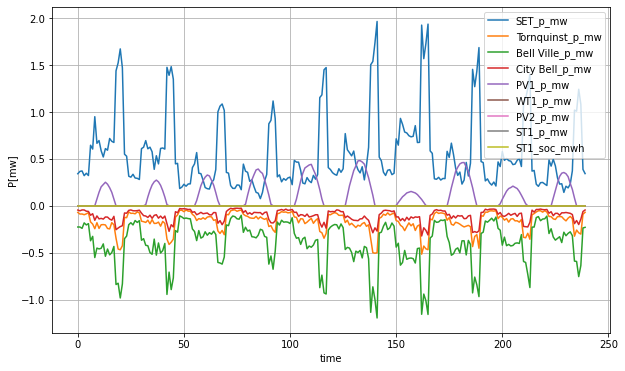

In [32]:
# Set the plot curve with markers and a title
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(10,6)
#a=180*24
#b=360
#b=180*24+5*24
a=0
b=240
for col in Resultados:
    ax.plot(Resultados[col][a:b], label = col)

ax.set_xlabel('time')
ax.set_ylabel('P[mw]')

ax.legend()

ax.grid(True)


plt.show()